<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/real_deal_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv('/content/sample_data/mlcourse_open_first_survey_parsed.csv', index_col='id')
df.head()

,Timestamp,Представьтесь в 2-3 фразах,Работали ли Вы с Jupyter notebooks?,Что Вы ждете от курса?,Потом мы прямо этот же набор данных поанализируем с Pandas. Так что какой Ваш любимый вид спорта?,"Ладно, посерьезней: согласны ли Вы на обработку персональных данных?","Какие оцениваете свой уровень математической подготовки? (матан, линал, теорвер)","Чему равна дисперсия равномерного на [0,6] распределения?","Найдите минимум функции 3x^4-8x^3+6x^2-12 на отрезке [-3,3]",Сколько параметров у нормального распределения?,Сможете написать на Python генератор чисел Фибоначчи?,"Хорошо, а готовы к началу курса (6 сентября 2017) освоить азы Python? На уровне Code Academy, DataCamp или github.com/Yorko/python_intro",Оцените свой уровень владения GitHub,"Посоветуйте хороший фильм в стиле ""Игра в имитацию"" :)"
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                    --------------  -----  
 0   Timestamp                                                                                                                                 2944 non-null   object 
 1   Представьтесь в 2-3 фразах                                                                                                                2944 non-null   object 
 2   Работали ли Вы с Jupyter notebooks?                                                                                                       2931 non-null   object 
 3   Что Вы ждете от курса?                               

In [73]:
df.shape

(2944, 14)

In [74]:
col_names_for_rename = dict(zip(df.columns,
                        ['time', 'intro', 'jupyter', 'expect', 'sport',
                         'personal', 'math_level',
                         'question_1', 'question_2', 'question_3', 'fib_gen',
                         'python', 'github', 'movie']))

df.rename(columns=col_names_for_rename, inplace=True)

In [75]:
df.head()

,time,intro,jupyter,expect,sport,personal,math_level,question_1,question_2,question_3,fib_gen,python,github,movie
id,,,,,,,,,,,,,,
0,2016/12/05 10:39:59 am GMT+3,крутой Developer,Да,"Ребята, вижу ваш настрой, уверен курс будет ин...",Starcraft,Да,4,3,-12,2.0,Да,Да,Проф,"Прочитай книгу Лема ""Голос Неба"", очень много ..."
1,2016/12/05 10:44:27 am GMT+3,Разработчик Navision. Изучаю тему DS для возмо...,Да,"Практики, подкрепленной теорией. Хочется упоря...",NaN,Да,1,3,NaN,2.0,"Да, но фиговый.",Да,Могу скачать материалы,NaN
2,2016/12/05 10:47:07 am GMT+3,"Я Software Engeneer разработчик, активно интер...",Да,Побольше практики на реальных данных (задачах).,basketball,Да,3,3,NaN,2.0,Да,Да,Проф,NaN
3,2016/12/05 10:47:22 am GMT+3,Семилетний инженер. Специализируюсь в компьюте...,Да,Глубокого разбора алгоритмов и инструментов.,NaN,Да,3,0.5,-12,2.0,Да,Да,"Пользуюсь ветками, могу что-то смерджить",Король говорит
5,2016/12/05 10:58:34 am GMT+3,программист. pl/sql python,Да,Упорядочить знания,футбол,Да,3,3,-12,2.0,Да,уже знаю,"Пользуюсь ветками, могу что-то смерджить",NaN


In [76]:
df['jupyter'].value_counts().head()

Да                                                              2071
Нет                                                              766
немного                                                            7
Немного                                                            3
Немного,  недавно начал проходить курс от яндекса на курсоре       2
Name: jupyter, dtype: int64

In [77]:
jp = df['jupyter'].map({'Да': 1, 'Нет': 0}).fillna(2)

In [78]:
jp

id
0       1.0
1       1.0
2       1.0
3       1.0
5       1.0
       ... 
3210    1.0
3212    1.0
3213    1.0
3214    1.0
3215    1.0
Name: jupyter, Length: 2944, dtype: float64

[Text(0.5, 0, 'Can you work with jupyter notebook?')]

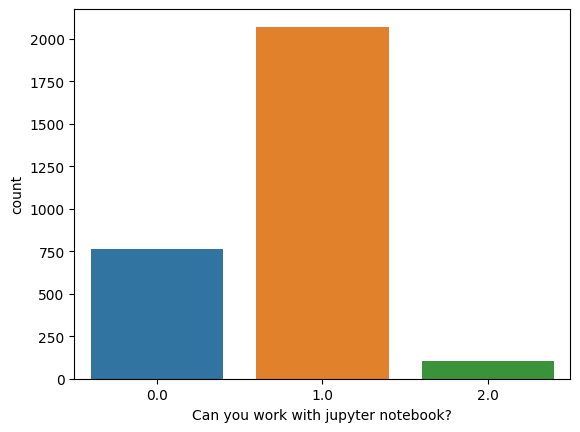

In [84]:
ax = sns.countplot(x=jp, data=df);
ax.set(xlabel='Can you work with jupyter notebook?')